<a href="https://colab.research.google.com/github/AnimeshBasak-14/Heart-Disease-Prediction-using-ANN/blob/main/ML_%7C_Heart_Disease_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code : Importing Libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


Code: Importing Dataset




Dataset link:[link text](https://www.kaggle.com/code/bulentsiyah/heart-disease-prediction-using-neural-networks)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification/Data set/ML | Heart Disease Prediction using ANN.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Description:



In [ ]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Code: Check for null values



In [ ]:
data.isnull().any()


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Assign Dependent and Independent variable



In [ ]:
X = data.iloc[:,:13].values
y = data["target"].values


Code : Split data into Train and Test dataset



In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )


Code: Scale the data.



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Code: Building the Model




In [ ]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
					units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14,
					kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
					kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
				metrics = ['accuracy'] )


Code : Fitting the Model



In [ ]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 )


Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.6415
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.8443
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.8443
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.8396
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.8396
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.8538
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.8726
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8726
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8726
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8726
Epoch 11/

Code : Performing prediction and rescaling




In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


3/3 [==============================] - 0s 3ms/step


Code: Confusion Matrix



In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[32, 12],
       [ 5, 42]])

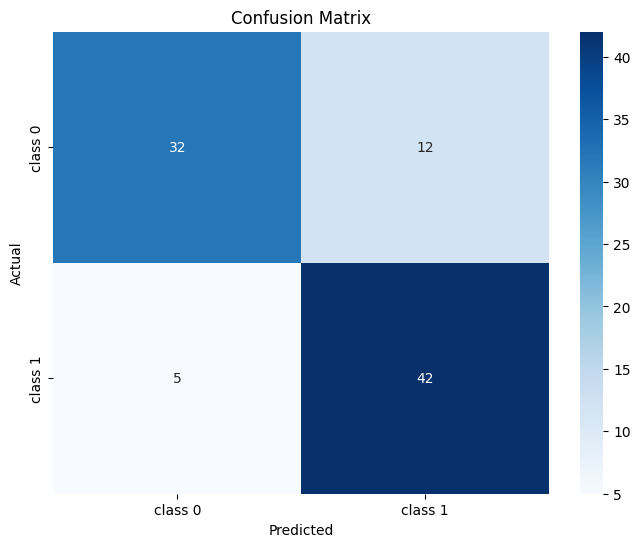

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["class 0", "class 1"], yticklabels=["class 0", "class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Code: Accuracy



In [ ]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)


81.31868131868131
